In this notebook, I will edit attempt 1 to try to solve the sine wave without volume interferring. 

In this notebook, I will model a Sine wave with variable Volume over time, and then attempt to build a small neural network capable of returning beta coefficients for 4 variables: Magnitude, Phase Shift, Period, and Intercept. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 

In [2]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, 
    and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A *numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, 
            "omega": w, 
            "phase": p, 
            "offset": c, 
            "freq": f, 
            "period": 1./f, 
            "fitfunc": fitfunc, 
            "maxcov": numpy.max(pcov), 
            "rawres": (guess,popt,pcov)}

In [4]:
df = pd.read_pickle('.././data/prepared/goog081420.pickle')

df.head()

,volume,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,...,"yearly_(0.19000000000000006, 0.19500000000000006]","yearly_(0.19500000000000006, 0.20000000000000007]","yearly_(0.20000000000000007, 0.20500000000000007]","yearly_(0.20500000000000007, 0.21000000000000008]","yearly_(0.21000000000000008, 0.21500000000000005]",pct_change_SMA_50,pct_change_SMA_120,diff_from_SMA_50,diff_from_SMA_120,target
1,1454365,-0.010603,-0.010547,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,...,0,0,0,0,0,0.000815,0.000240,0.003826,0.088502,0.017766
2,1289530,0.001077,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,...,0,0,0,0,0,0.001066,0.000282,0.015195,0.099850,-0.010547
3,1577826,-0.003747,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,...,0,0,0,0,0,0.001217,0.000311,0.015028,0.098461,0.001077
4,1995368,0.017817,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,...,0,0,0,0,0,0.001276,0.000336,0.019915,0.102414,-0.003740
5,1979957,0.005880,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,...,0,0,0,0,0,0.000928,0.000220,0.003026,0.082810,0.017976


In [6]:
df['target_by_volume'] = df['target'] / df['volume']

In [34]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903],
           dtype='int64', length=3903)

In [94]:
x_train = df.index[-40:]
y_train = df['target_by_volume'][-40:]

x_test = df.index[-40:]
y_test = df['target_by_volume'][-40:]

In [95]:
x_train, y_train

(Int64Index([3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874,
             3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885,
             3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896,
             3897, 3898, 3899, 3900, 3901, 3902, 3903],
            dtype='int64'),
 3864   -4.549174e-10
 3865    2.282124e-09
 3866    1.971114e-10
 3867    1.095046e-09
 3868    2.356605e-09
 3869   -1.921861e-10
 3870    2.663369e-11
 3871    3.782368e-10
 3872   -5.830394e-10
 3873    1.632355e-09
 3874    1.555576e-10
 3875    1.887452e-10
 3876   -8.414950e-10
 3877    3.287720e-10
 3878    2.529994e-10
 3879    1.477343e-09
 3880   -8.078480e-10
 3881    9.272082e-10
 3882   -9.835013e-10
 3883   -5.521124e-10
 3884   -3.322290e-10
 3885   -1.290800e-09
 3886   -1.102095e-09
 3887    1.154487e-09
 3888   -3.897436e-10
 3889    6.776781e-10
 3890   -2.537782e-10
 3891   -6.560433e-10
 3892    5.713554e-10
 3893   -3.094304e-10
 3894   -8.362798e-

In [96]:
res['fitfunc'](x_test)

Float64Index([ -2.565231260382731e-10,   4.463332885898467e-10,
              -2.7055462746850556e-10,     4.5919681825473e-10,
              -2.8222922778307215e-10,   4.696634686674095e-10,
              -2.9147087576466675e-10,   4.776650574932826e-10,
              -2.9821936904575836e-10,   4.831494604150969e-10,
              -3.0243074628161753e-10,   4.860809506835709e-10,
               -3.040775735253258e-10,    4.86440431850224e-10,
               -3.031491229392527e-10,   4.842255621664168e-10,
               -2.996514426788277e-10,   4.794507698378201e-10,
               -2.936073174933685e-10,   4.721471590358345e-10,
               -2.850561203006213e-10,   4.623623072772277e-10,
              -2.7405355570189223e-10,    4.50159955492511e-10,
              -2.6067129710857677e-10,  4.3561959280184465e-10,
              -2.4499651984393246e-10,   4.188359387033614e-10,
               -2.271313332615866e-10,  3.9991832604706376e-10,
              -2.0719211558009742e-10,  

Amplitude=3.953552419068097e-10, Angular freq.=3.181959054420944, phase=-158.0422318447481, offset=9.12525793197832e-11, Max. Cov.=88257.13080819152


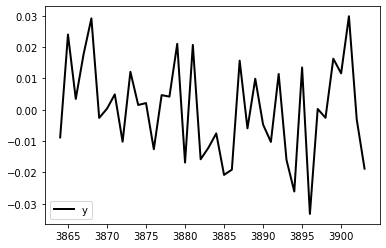

In [99]:
import pylab as plt

#N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
#tt = numpy.linspace(0, 10, N)
#tt2 = numpy.linspace(0, 10, 10*N)
#yy = amp*numpy.sin(omega*tt + phase) + offset
#yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(x_train, y_train)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(x_test, y_test*df['volume'][-40:], "-k", label="y", linewidth=2)
#plt.plot(tt, yynoise, "ok", label="y with noise")
#plt.plot(x_test, res["fitfunc"](x_test)*df['volume'][-40:], "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

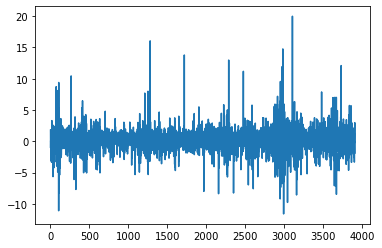

In [28]:
plt.plot(df['target']*100)

In [33]:
df['volume'].describe()

count    3.903000e+03
mean     6.498072e+06
std      7.475381e+06
min      7.931000e+03
25%      1.692668e+06
50%      4.042058e+06
75%      8.252296e+06
max      8.229865e+07
Name: volume, dtype: float64

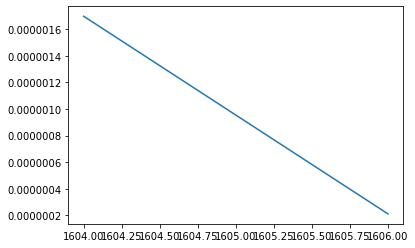

In [24]:
plt.plot(x[y*100000000 > 20], y[y*100000000 > 20])

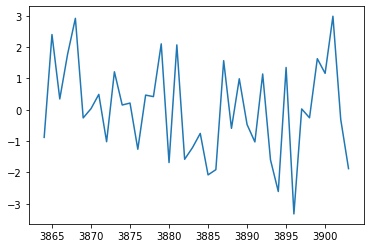

In [103]:
plt.plot(df['target'][-40:]*100)

In [107]:
tar100 = df['target'][-40:]*100
tar100.mean()

0.01766968990125497

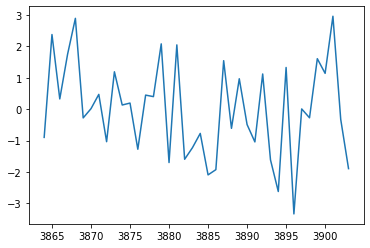

In [112]:
plt.plot(tar100 - tar100.mean())